<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a href="https://agrum.gitlab.io/pages/pyagrum.html" target="blank"><img src="https://agrum.gitlab.io/images/pyAgrum.png" align="right" style="height:75px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a><br/>
Author: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

<font size="+3" color="GREEN">**Where is my Bag ?**</font>

#### This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 3 page 115. 

In [6]:
from IPython.display import display, Math, Latex,HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import os
import matplotlib.pyplot as plt

import seaborn as sns

>After making a stopover, a passenger is waiting for his luggage. What are the chances that his luggage wasn't properly routed and got lost? 
The appearance of his luggage on the carousel has two causes, its presence on the plane (if not, then there are no chances for him to recover it) and the time he spent waiting in front of the carousel. (The more he waits, the more his chances of seeing his luggage increase.)

## We create the model :
The corresponding Bayesian Network
 is the following:

In [7]:
ab = gum.fastBN('Elapsed time[11]->Bag on Carousel<-Bag on Plane')
ab

(gum::BayesNet<double>@000001FEB064FBE0) BN{nodes: 3, arcs: 2, domainSize: 44, dim: 57}

In [8]:
# We fill the CPTs
ab.cpt("Bag on Plane").fillWith(1).normalize()
ab.cpt("Elapsed time").fillWith(1).normalize()
ab.cpt("Bag on Carousel").fillWith([1.0,0.0]*11+[1-i/20 if i%2==0 else (i-1)/20 for i in range(22)])

(gum::Potential<double>@000001FEB0025480) 
             ||  Bag on Carousel  |
Elapse|Bag on||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 1.0000  | 0.0000  |
2     |0     || 1.0000  | 0.0000  |
3     |0     || 1.0000  | 0.0000  |
4     |0     || 1.0000  | 0.0000  |
5     |0     || 1.0000  | 0.0000  |
[...10 more line(s) ...]
5     |1     || 0.5000  | 0.5000  |
6     |1     || 0.4000  | 0.6000  |
7     |1     || 0.3000  | 0.7000  |
8     |1     || 0.2000  | 0.8000  |
9     |1     || 0.1000  | 0.9000  |
10    |1     || 0.0000  | 1.0000  |

In [9]:
gnb.sideBySide(ab,ab.cpt("Bag on Plane"),
               ab.cpt("Elapsed time"),
               captions=["the BN","marginal for $BagOnPlane$","marginal for $Elapsed time$"])

### It is obvious that: <br>
* If the bag is on the plane, you will receive it within the 10 minutes:
$$P(BagOnCarousel = True \mid ElapsedTime = 10,BagOnPlane = True) = 1$$ 

## If $x$ minutes have passed and I still haven't gotten my bag, what is the probability that it was not on the plane ?

> We are interested in probability: $$P(Bag On plane = False \mid ElapsedTime = x)$$
In other words, you are waiting by the carousel at the airport, $x$ minutes have passed and you still haven't received your bag what's the probability that you'll eventually receive it ?. We're looking for the probability that you'll eventually receive your bag (i.e. your bag being on the plane as we saw above.) given that $x$ minutes have passed.

In [17]:
# inference engine : LazyPropagation
ie1 = gum.LazyPropagation(ab) 
ie1.setEvidence({"Elapsed time" : 0})
time = {}
# For every value of elapsed time
for t in range(0,11):
    # We get the probability of eventually receiving the bag
    ie1.chgEvidence("Elapsed time",t)
    ie1.makeInference()
    time[t]=ie1.posterior("Bag on Plane")[0]
# time is a dictionary : for x in [0,10] {x minutes : P(Bag On plane = true | ElapsedTime = x minutes,BagOnCarousel = False)}

### The curve of Abandoning Hope:

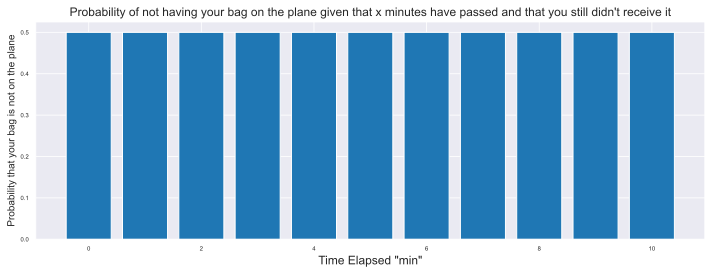

In [20]:
# plot style
sns.set_style('darkgrid')
# labels size
plt.rc('xtick', labelsize = 6)
plt.rc('ytick', labelsize = 6)
#figure size
plt.figure(figsize=(12,4))
plt.xlabel('Time Elapsed "min"', fontsize = 12)
plt.ylabel('Probability that your bag is not on the plane', fontsize=10)
#title
plt.title('Probability of not having your bag on the plane given that x minutes have passed and that you still didn\'t receive it', fontsize=12)
plt.bar(time.keys(), time.values())
plt.show()

In [14]:
# inference engine : LazyPropagation
ie1 = gum.LazyPropagation(ab) 
ie1.setEvidence({"Elapsed time" : 0, "Bag on Carousel" : 0})
time = {}
# For every value of elapsed time
for t in range(0,11):
    # We get the probability of eventually receiving the bag
    ie1.chgEvidence("Elapsed time",t)
    ie1.makeInference()
    time[t]=ie1.posterior("Bag on Plane")[0]
# time is a dictionary : for x in [0,10] {x minutes : P(Bag On plane = true | ElapsedTime = x minutes,BagOnCarousel = False)}

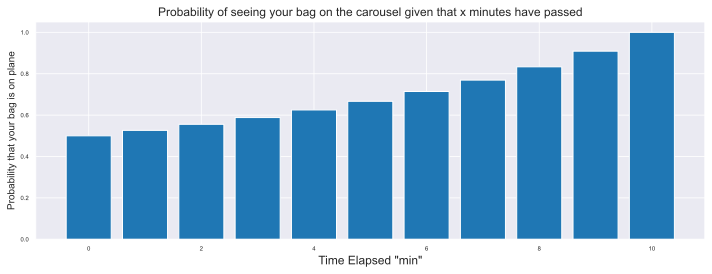

In [15]:
# plot style
sns.set_style('darkgrid')
# labels size
plt.rc('xtick', labelsize = 6)
plt.rc('ytick', labelsize = 6)
#figure size
plt.figure(figsize=(12,4))
plt.xlabel('Time Elapsed "min"', fontsize = 12)
plt.ylabel('Probability that your bag is on plane', fontsize=10)
#title
plt.title('Probability of not having your bag on the plane given that x minutes have passed and that you still didn\'t receive it', fontsize=12)
plt.bar(time.keys(), time.values())
plt.show()